In [66]:
# dependancies
import pandas
import matplotlib.pyplot as plt

In [67]:
# this cell reserved for testing
with open("actually_final_i_promise.csv") as inbox:
    DF = pandas.read_csv(inbox)
DF.head()

,Unnamed: 0,Unnamed: 0_x,Player_Id,Team_Id,Name,Year,Position,Games_Played,passing yards,passing touchdowns,...,receiving yards,receiving touchdowns,receptions,kick returns,punt returns,total annual points,Unnamed: 0_y,player_id,name,college
0,0,0,05b0c05e-ec5b-4c41-9ff6-55ffcbdab955,768c92aa-75ff-4a43-bcc0-f2798c2e1724,Alex Van Pelt,2000,QB,1,2.68,0,...,0.0,0,0,0,0,2.68,0,05b0c05e-ec5b-4c41-9ff6-55ffcbdab955,Alex Van Pelt,Pittsburgh
1,1,1,1454f252-2a45-4a4d-bce6-c9a4958514cb,768c92aa-75ff-4a43-bcc0-f2798c2e1724,Jeremy McDaniel,2000,WR,16,0.00,0,...,69.7,12,43,0,0,81.70,1,1454f252-2a45-4a4d-bce6-c9a4958514cb,Jeremy McDaniel,Arizona
2,2,2,229596c9-a494-4293-8bbc-76203995b92f,768c92aa-75ff-4a43-bcc0-f2798c2e1724,Shawn Bryson,2000,RB,16,0.00,0,...,27.1,12,32,0,0,96.20,2,229596c9-a494-4293-8bbc-76203995b92f,Shawn Bryson,Tennessee
3,3,3,34147754-f18a-4071-9895-dd541c78260e,768c92aa-75ff-4a43-bcc0-f2798c2e1724,Doug Flutie,2000,QB,11,68.00,32,...,0.0,0,0,0,0,106.10,3,34147754-f18a-4071-9895-dd541c78260e,Doug Flutie,Boston College
4,4,4,39536e35-74fb-4287-8550-1304b16256a5,768c92aa-75ff-4a43-bcc0-f2798c2e1724,Jay Riemersma,2000,TE,12,0.00,0,...,37.2,30,31,0,0,65.20,4,39536e35-74fb-4287-8550-1304b16256a5,Jay Riemersma,Michigan


In [68]:
def setup(df, x, y, function):
    """Takes a dataframe, two column names from it and a lambda function to be applied to a loc of the dataframe to return an int. returns a dataframe set up per spec"""
    result = {}
    for each in df[x].unique():
        result[each] = {}
        for other in df[y].unique():
            ball = df.loc[df[x] == each]
            ball = ball.loc[ball[y] == other]
            result[each][other] = function(ball)
    return pandas.DataFrame(result)

In [69]:
# this cell reserved for testing
setup(DF, "Position", "Year", lambda x: (x["total annual points"].mean()/x["Games_Played"].mean())).head()

,FB,QB,RB,TE,WR
2000,1.634314,8.479792,6.712204,1.846223,4.410737
2001,1.791867,8.725694,6.012700,2.034392,4.565254
2002,1.429018,10.277287,6.914298,1.988362,4.630944
2003,1.285471,8.292097,6.496205,1.925098,4.352613
2004,1.496692,9.453229,6.898303,2.233829,4.586259


In [70]:
def pretty_picture(df, x_title, y_title, title):
    """Takes a dataframe of the format we're using for our results. sets it up as a matplotlib plot. returns True if successful"""
    colorlist = ["#e6194b", "#3cb44b", "#0082c8", "#f58231", "#911eb4", "#46f0f0", "#f032e6", "#ffe119", "#d2f53c", "#fabebe", "#000080", "#ffd8b1", "#808000", "#aaffc3", "#800000", "#fffac8", "#aa6e28", "#e6beff", "#008080"]
    markerlist = [".", "o", "v", "^", "<", ">", "1", "2", "3", "4", "8", "s" "p", "P", "*", ",", "h", "H", "+", "x", "X", "D", "d", "|", "_"]
    ball = []
    plt.figure(figsize = (22, 10))
    for each in range(len(df.columns)):
        ball.append(plt.errorbar(df.index, df[df.columns[each]], label = df.columns[each], color = colorlist[each], marker = markerlist[each]))
    plt.xticks(df.index)
    plt.legend(loc = "best")
    plt.xlabel(x_title)
    plt.ylabel(y_title)
    plt.title(title)
    plt.grid(alpha = .25)

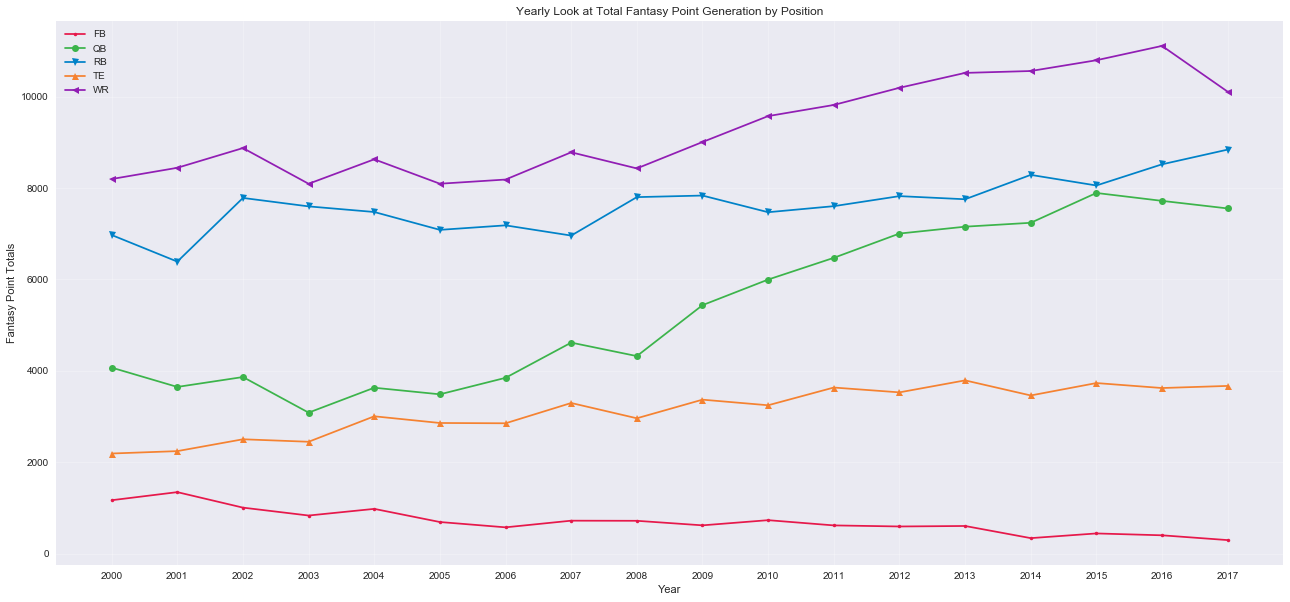

In [74]:
test_data = setup(DF, "Position", "Year", lambda x: x["total annual points"].sum())
pretty_picture(test_data, "Year", "Fantasy Point Totals", "Yearly Look at Total Fantasy Point Generation by Position")
plt.show()
plt.savefig('Yearly Total Fantasy Point Generation by Position.png')

In [72]:
# this cell reserved for testing
setup(DF, "Year", "Position", lambda x: x["total annual points"].sum()).head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
FB,1166.90,1343.90,1004.60,831.70,977.34,689.40,573.10,718.90,716.22,616.80,730.02,615.40,592.00,602.68,336.80,439.40,398.70,293.80
QB,4070.30,3647.34,3864.26,3084.66,3630.04,3485.76,3846.90,4617.82,4322.60,5437.66,5998.42,6474.20,7005.92,7156.14,7241.34,7894.50,7721.56,7555.68
RB,6973.98,6391.50,7785.50,7600.56,7477.76,7086.64,7185.24,6961.38,7803.50,7837.88,7473.00,7605.44,7825.30,7756.82,8290.30,8058.14,8521.70,8843.94
TE,2189.62,2241.90,2501.36,2446.80,3004.50,2858.00,2851.50,3295.70,2961.18,3368.70,3246.00,3634.20,3528.50,3790.90,3460.74,3732.40,3623.40,3669.60
WR,8199.56,8445.72,8877.52,8095.86,8631.34,8096.74,8188.46,8785.02,8431.72,9009.84,9577.58,9821.30,10196.94,10523.36,10564.72,10800.48,11114.44,10112.18


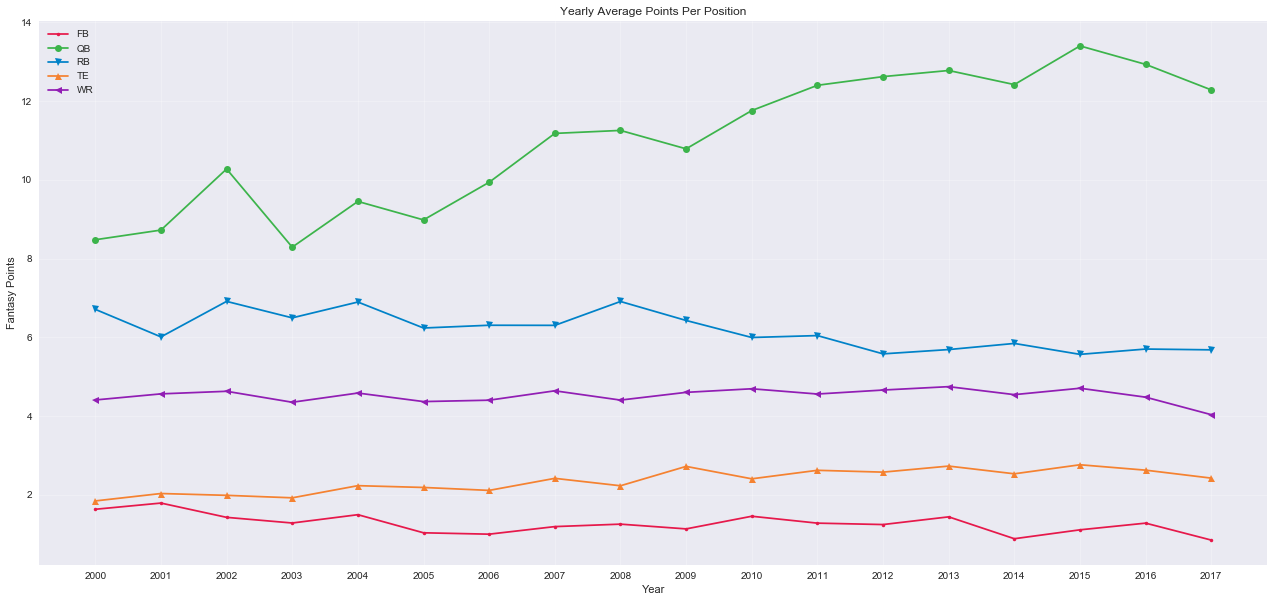

In [73]:
test_data = setup(DF, "Position", "Year", lambda x: (x["total annual points"].mean()/x["Games_Played"].mean()))
pretty_picture(test_data, "Year", "Fantasy Points", "Yearly Average Points Per Position")

plt.style.use('seaborn')
plt.show()
plt.savefig('Yearly Average Points Per Position.png')

In [85]:
def plot_bar(df, x_title, y_title, title):
    """Takes a dataframe of the format we're using for our results. sets it up as a matplotlib plot. returns True if successful"""
    colorlist = ["#e6194b", "#3cb44b", "#0082c8", "#f58231", "#911eb4", "#46f0f0", "#f032e6", "#ffe119", "#d2f53c", "#fabebe", "#000080", "#ffd8b1", "#808000", "#aaffc3", "#800000", "#fffac8", "#aa6e28", "#e6beff", "#008080"]
    markerlist = [".", "o", "v", "^", "<", ">", "1", "2", "3", "4", "8", "s" "p", "P", "*", ",", "h", "H", "+", "x", "X", "D", "d", "|", "_"]
    ball = []
    plt.figure(figsize = (22, 10))
    for each in range(len(df.columns)):
        ball.append(plt.plot(df.index, df[df.columns[each]], label = df.columns[each], color = colorlist[each], marker = markerlist[each], type='bar'))
    #plt.xticks(df.index)
    plt.legend(loc = "best")
    plt.xlabel(x_title)
    plt.ylabel(y_title)
    plt.title(title)
    plt.grid(alpha = .25)

In [87]:
setup(DF, "Year", "college", lambda x: (x["total annual points"].sum()))

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Arizona,81.70,28.50,2.20,90.20,51.70,-1.90,183.60,106.70,100.60,227.90,264.10,287.50,259.86,338.14,323.22,217.40,118.10,180.18
Boston College,145.06,97.92,343.80,301.04,271.18,234.62,147.08,242.14,239.04,348.10,394.24,453.52,373.34,249.10,418.30,341.04,344.46,233.20
Colorado,340.40,445.50,234.76,226.60,256.78,211.02,56.90,193.50,73.80,90.80,15.40,11.40,15.60,6.90,31.10,4.00,35.30,106.30
Ferris State,0.00,0.00,0.00,6.90,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Houston,334.90,362.20,294.90,95.70,87.80,84.50,0.00,24.70,-3.90,1.80,11.90,89.00,95.00,194.20,48.20,0.00,113.24,235.88
Louisiana State,0.00,0.00,60.90,72.60,15.20,56.60,54.30,191.70,206.54,109.82,289.32,317.92,434.42,471.98,1004.12,947.36,869.90,545.70
Miami (FL),389.50,287.20,301.74,380.90,589.70,512.00,378.90,498.20,207.80,157.30,75.50,147.00,109.20,49.70,0.00,0.00,0.00,0.00
Michigan,1114.80,1002.94,861.26,789.90,677.08,485.30,486.76,802.54,408.42,783.84,901.82,676.62,592.84,477.16,448.94,470.10,333.16,429.64
Mississippi,81.70,136.28,350.80,309.20,269.72,303.88,380.06,181.04,342.32,348.24,637.98,680.82,597.72,534.32,523.90,551.98,440.98,460.62
Mississippi State,237.20,138.30,204.10,157.60,189.90,194.80,244.90,267.00,210.40,111.60,66.00,33.50,128.40,26.40,58.10,21.50,279.48,258.66
